# Data Science Project

In [2]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [3]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [4]:
# Dataset is already loaded below
data = pd.read_csv("/Users/anitateladevalapalli/Downloads/train_exp.csv")

In [5]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [6]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [7]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692463,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2870 non-null   int64  
 1   region               2870 non-null   object 
 2   latitude             2870 non-null   float64
 3   longitude            2870 non-null   float64
 4   accommodation_type   2870 non-null   object 
 5   cost                 2870 non-null   int64  
 6   minimum_nights       2870 non-null   int64  
 7   number_of_reviews    2870 non-null   int64  
 8   reviews_per_month    2194 non-null   float64
 9   owner_id             2870 non-null   int64  
 10  owned_hotels         2870 non-null   int64  
 11  yearly_availability  2870 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


#### Replacing the null values in column 'reviews_per_month' with mean value.

In [9]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

In [10]:
data.isnull().sum()

id                     0
region                 0
latitude               0
longitude              0
accommodation_type     0
cost                   0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
owner_id               0
owned_hotels           0
yearly_availability    0
dtype: int64

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [11]:
#Loading Test data
test_data=pd.read_csv('/Users/anitateladevalapalli/Downloads/test_exp.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [12]:
data['region'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [13]:
data['accommodation_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [14]:
;

''

#### Plotting categorical graph for understanding relation between region, cost and accommodation_type

/Users/anitateladevalapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anitateladevalapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 94.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anitateladevalapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anitateladevalapalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

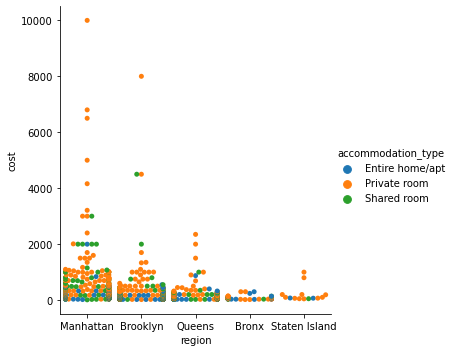

In [65]:
sns.catplot(x='region', y='cost',data = data, kind = 'swarm', hue='accommodation_type')

The above graph shows that all types of accomodation in Manhattan are expensive. 
Also, The cost of Entire home/apt and Shared room is lowest in Staten Island. Whereas, the cost of Private room is lowest in Bronx. 





**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [16]:
df = data.drop(['id','latitude','longitude','owner_id','reviews_per_month'],axis = 1)

In [17]:
df.head()

,region,accommodation_type,cost,minimum_nights,number_of_reviews,owned_hotels,yearly_availability
0,Manhattan,Entire home/apt,170,5,7,1,0
1,Brooklyn,Entire home/apt,65,3,238,1,0
2,Queens,Private room,85,1,0,1,1
3,Manhattan,Private room,210,30,0,65,1
4,Manhattan,Shared room,75,3,38,3,1


#### Visualizing the correlation between various features

<AxesSubplot:>

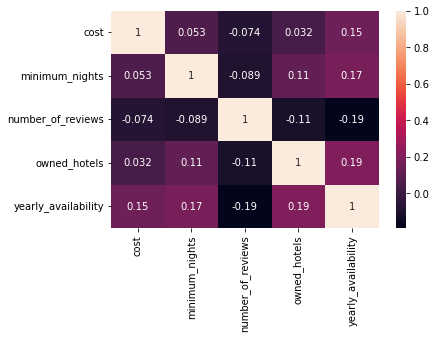

In [18]:
sns.heatmap(df.corr(),annot=True)

#### Converting the categorical columns "region" and "accommodation_type" into numerical values

In [19]:
le = LabelEncoder()

In [20]:
df['region_type'] = le.fit_transform(df['region'])

In [21]:
df['type_of_accommodation'] = le.fit_transform(df['accommodation_type'])

#### Dropping categorical columns

In [22]:
df = df.drop(['region','accommodation_type'], axis = 1)

In [23]:
df.head()

,cost,minimum_nights,number_of_reviews,owned_hotels,yearly_availability,region_type,type_of_accommodation
0,170,5,7,1,0,2,0
1,65,3,238,1,0,1,0
2,85,1,0,1,1,3,1
3,210,30,0,65,1,2,1
4,75,3,38,3,1,2,2


In [24]:
X = df.drop(['yearly_availability'], axis = 1)
y = df['yearly_availability']

#### Selecting the KBest features using Chi score

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)

In [26]:
dfScores = pd.DataFrame(fit.scores_)
dfCols = pd.DataFrame(X.columns)

In [27]:
finalDf = pd.concat([dfScores,dfCols], axis = 1)
finalDf.columns = ['Scores','Features']

In [28]:
finalDf

,Scores,Features
0,52611.564592,cost
1,10806.238676,minimum_nights
2,6814.107342,number_of_reviews
3,9228.943439,owned_hotels
4,4.504857,region_type
5,246.037318,type_of_accommodation


#### Selecting the Best features using ExtraTreesClassifier

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

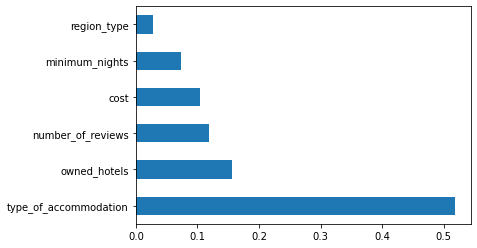

In [31]:
feature_imp = pd.Series(model.feature_importances_, index= X.columns)
feature_imp.nlargest(7).plot(kind='barh')
plt.show()

In [32]:
df.describe()

,cost,minimum_nights,number_of_reviews,owned_hotels,yearly_availability,region_type,type_of_accommodation
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000
mean,195.943206,11.530314,16.315331,8.411498,0.498606,1.709756,0.874913
std,406.184714,37.972339,32.481722,27.105522,0.500085,0.740038,0.746805
min,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,75.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,120.000000,3.000000,4.000000,1.000000,0.000000,2.000000,1.000000
75%,200.000000,6.000000,16.000000,3.000000,1.000000,2.000000,1.000000
max,9999.000000,999.000000,395.000000,327.000000,1.000000,4.000000,2.000000


#### Scaling data using StandardScaler

In [33]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaledFeatures = scaler.fit_transform(df[['cost','minimum_nights','number_of_reviews','owned_hotels','region_type','type_of_accommodation']])

In [34]:
X = pd.DataFrame(scaledFeatures)

In [35]:
y = df['yearly_availability']

#### Splitting dataset into train and validation data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size= 0.25, random_state= 42)

#### Using LogisticRegression for prediction

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)
predict = log.predict(X_val)
print("Accuracy  :: {}".format(accuracy_score(y_val,predict)))

Accuracy  :: 0.6908077994428969


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val,predict))
print(confusion_matrix(y_val,predict))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       357
           1       0.71      0.65      0.68       361

    accuracy                           0.69       718
   macro avg       0.69      0.69      0.69       718
weighted avg       0.69      0.69      0.69       718

[[262  95]
 [127 234]]


#### Using KNeighborsClassifier for prediction

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predict = knn.predict(X_val)
print("Accuracy  :: {}".format(accuracy_score(y_val,predict)))
print(classification_report(y_val,predict))
print(confusion_matrix(y_val,predict))

Accuracy  :: 0.8871866295264624
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       357
           1       0.89      0.89      0.89       361

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718

[[317  40]
 [ 41 320]]


In [40]:
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_val)
    error_rate.append(np.mean((y_val!=predict)))

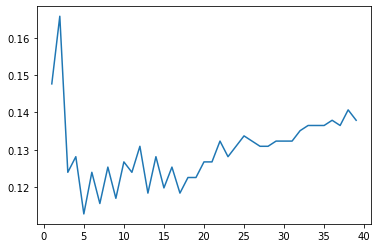

In [41]:
plt.plot(range(1,40), error_rate)

In [42]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
predict = knn.predict(X_val)
print("Accuracy  :: {}".format(accuracy_score(y_val,predict)))
print(classification_report(y_val,predict))
print(confusion_matrix(y_val,predict))

Accuracy  :: 0.8342618384401114
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       357
           1       0.90      0.76      0.82       361

    accuracy                           0.83       718
   macro avg       0.84      0.83      0.83       718
weighted avg       0.84      0.83      0.83       718

[[325  32]
 [ 87 274]]


#### Using DecisionTreeClassifier for prediction

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predict = dtree.predict(X_val)
print("Accuracy  :: {}".format(accuracy_score(y_val,predict)))
print(classification_report(y_val,predict))
print(confusion_matrix(y_val,predict))

Accuracy  :: 0.8899721448467967
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       357
           1       0.90      0.88      0.89       361

    accuracy                           0.89       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.89      0.89      0.89       718

[[323  34]
 [ 45 316]]


#### Using RandomForestClassifier for prediction

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3000)
rf.fit(X_train,y_train)
predict = rf.predict(X_val)
print("Accuracy  :: {}".format(accuracy_score(y_val,predict)))
print(classification_report(y_val,predict))
print(confusion_matrix(y_val,predict))

Accuracy  :: 0.9164345403899722
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       357
           1       0.91      0.93      0.92       361

    accuracy                           0.92       718
   macro avg       0.92      0.92      0.92       718
weighted avg       0.92      0.92      0.92       718

[[322  35]
 [ 25 336]]


In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
print(accuracy_score(y_val,predict))
print(classification_report(y_val, predict))
print(confusion_matrix(y_val,predict))

0.9164345403899722
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       357
           1       0.91      0.93      0.92       361

    accuracy                           0.92       718
   macro avg       0.92      0.92      0.92       718
weighted avg       0.92      0.92      0.92       718

[[322  35]
 [ 25 336]]


In [46]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
clf.fit(X_train,y_train)
y_pred=clf.predict(X_val)
print(accuracy_score(y_val,predict))
print(classification_report(y_val, predict))
print(confusion_matrix(y_val,predict))


0.9164345403899722
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       357
           1       0.91      0.93      0.92       361

    accuracy                           0.92       718
   macro avg       0.92      0.92      0.92       718
weighted avg       0.92      0.92      0.92       718

[[322  35]
 [ 25 336]]


#### Since, the accuracy of RandomForestClassifier was the best (i.e 0.90), I thought of choosing it for prediction on the test data.

In [47]:
X_val

,0,1,2,3,4,5
443,0.009989,-0.251024,-0.009710,-0.273479,0.392270,-1.171745
2394,-0.236247,-0.277364,-0.009710,-0.236580,-0.959247,0.167525
761,1.672084,-0.251024,-0.502380,-0.125882,1.743787,-1.171745
651,-0.369215,-0.277364,-0.471588,-0.273479,1.743787,0.167525
2674,-0.300268,-0.224685,-0.502380,-0.273479,0.392270,1.506796
...,...,...,...,...,...,...
1381,-0.347053,0.433804,-0.502380,-0.273479,-0.959247,0.167525
2659,-0.285494,-0.172006,-0.471588,-0.273479,-0.959247,1.506796
482,-0.150064,-0.198345,2.084140,-0.199680,-0.959247,0.167525
2672,-0.396301,-0.277364,-0.286837,-0.199680,-0.959247,1.506796


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [48]:
test_data['reviews_per_month'] = test_data['reviews_per_month'].fillna(test_data['reviews_per_month'].mean())

#### Preprocessing the test data and predicting using RandomForestClassifier

In [49]:
test_data_df = test_data.drop(['id','latitude','longitude','owner_id','reviews_per_month'],axis = 1)

In [50]:
test_data_df['region_type'] = le.fit_transform(test_data_df['region'])

In [51]:
test_data_df['type_of_accommodation'] = le.fit_transform(test_data_df['accommodation_type'])

In [52]:
test_data_df = test_data_df.drop(['region','accommodation_type'],axis = 1)

In [53]:
scaledFeatures_test = scaler.fit_transform(test_data_df[['cost','minimum_nights','number_of_reviews','owned_hotels','region_type','type_of_accommodation']])

In [54]:
scaledFeatures_test_df = pd.DataFrame(scaledFeatures_test)

In [55]:
scaledFeatures_test_df.head()

,0,1,2,3,4,5
0,-0.125977,-0.179191,0.270446,-0.273858,-0.892332,1.413036
1,-0.297271,-0.179191,-0.250743,-0.237845,-0.892332,-1.185069
2,0.107607,0.321428,-0.548566,0.122283,0.467953,0.113984
3,-0.151930,0.321428,-0.213515,-0.273858,0.467953,1.413036
4,-0.364751,-0.197070,-0.064604,-0.237845,0.467953,-1.185069


In [56]:
predict_test = rf.predict(scaledFeatures_test_df)

In [57]:
predict_test

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [58]:
test_data

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.660000,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.900000,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,1.200385,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.820000,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.720000,105061915,2
...,...,...,...,...,...,...,...,...,...,...,...
713,26801,Bronx,40.84590,-73.91558,Entire home/apt,77,2,36,1.810000,153826581,1
714,20110,Brooklyn,40.71026,-73.94744,Entire home/apt,145,3,43,1.360000,4198285,1
715,31383,Manhattan,40.71390,-73.99120,Entire home/apt,90,2,60,4.350000,151507961,1
716,47135,Manhattan,40.74399,-73.97204,Private room,200,30,0,1.200385,221200420,23


In [59]:
columns = ['id','yearly_availability']

In [60]:
submission_df = pd.DataFrame(test_data,columns=columns)

In [61]:
submission_df['yearly_availability'] = predict_test

In [62]:
submission_df

,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,0
4,28873,0
...,...,...
713,26801,0
714,20110,0
715,31383,0
716,47135,1


In [63]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---